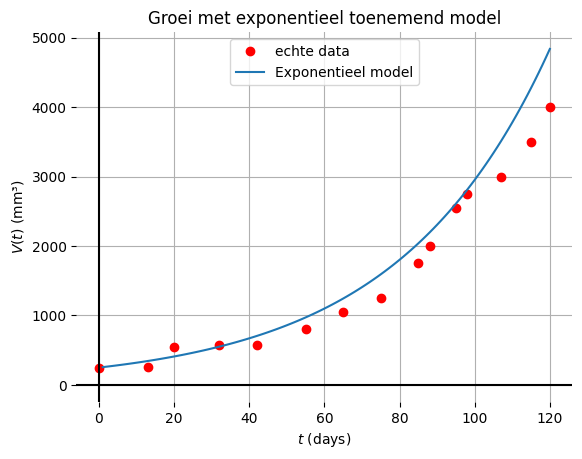

In [1]:
# Kleine test gebaseerd op: gepubliceerd door S.S. Hassan & H.M. Al-Saedi, 
# 2024 ("Comparative Study of Tumor Growth Based on Single Species Models", 
# BIO Web of Conferences 97, 00118)

import pandas as pd
from ode_solver import *

ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

pd.DataFrame({'$t$': ts, '$V$': Vs}).T

test1 = ode_solver(250, 120, 1)
dagen, volumes = test1.exponentieel_toenemend(0.025) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, 'or', label = 'echte data')
test1.plot(dagen, volumes, 'Exponentieel model')

plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.title('Groei met exponentieel toenemend model'); plt.xlabel('$t$ (days)'); plt.ylabel('$V(t)$ (mm³)')
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan redelijk goed een lijn vormen door de data

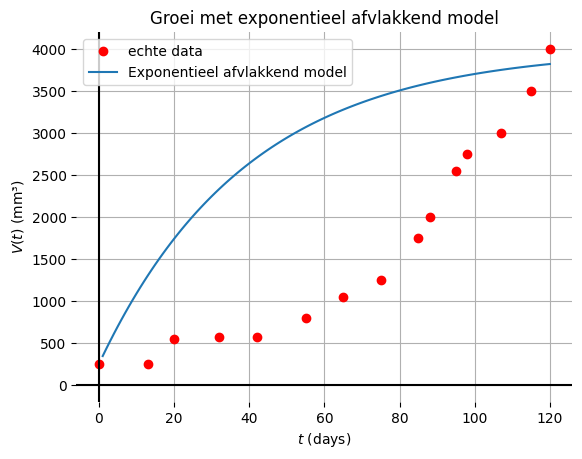

In [2]:
test2 = ode_solver(250, 120, 1)
dagen, volumes = test2.exponentieel_afvlakkend(0.025, 4000) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, 'or', label = 'echte data')
test2.plot(dagen, volumes, 'Exponentieel afvlakkend model')

plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.title('Groei met exponentieel afvlakkend model'); plt.xlabel('$t$ (days)'); plt.ylabel('$V(t)$ (mm³)')
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan niet zo goed een lijn vormen door de data

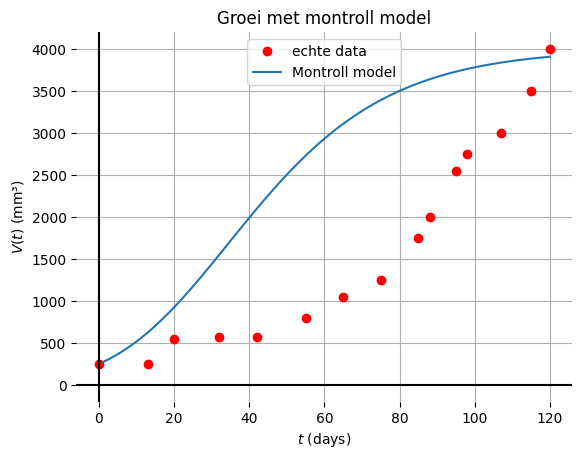

In [3]:
test3 = ode_solver(250, 120, 1)
dagen, volumes = test3.montroll(0.015, 0.28, 4000) # Hiermee dingen uitgeprobeerd 
                                          # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, 'or', label = 'echte data')
test3.plot(dagen, volumes, 'Montroll model')

plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.title('Groei met montroll model'); plt.xlabel('$t$ (days)'); plt.ylabel('$V(t)$ (mm³)')
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan niet zo goed een lijn vormen door de data

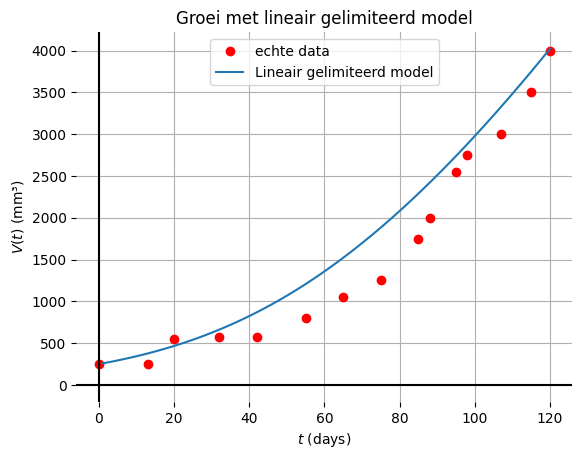

In [4]:
test4 = ode_solver(250, 120, 1)
dagen, volumes = test4.lineair_gelimiteerd(90, 2500) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, 'or', label = 'echte data')
test4.plot(dagen, volumes, 'Lineair gelimiteerd model')

plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.title('Groei met lineair gelimiteerd model'); plt.xlabel('$t$ (days)'); plt.ylabel('$V(t)$ (mm³)')
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan redelijk goed een lijn vormen door de data

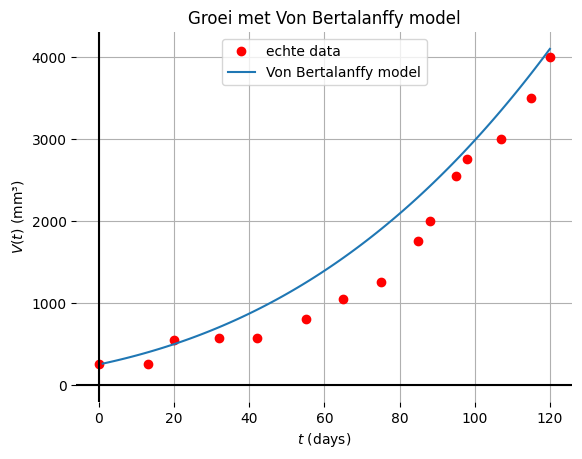

In [5]:
test5 = ode_solver(250, 120, 1)
dagen, volumes = test5.von_bertalanffy(0.25, 0.0005) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, 'or', label = 'echte data')
test5.plot(dagen, volumes, 'Von Bertalanffy model')

plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.title('Groei met Von Bertalanffy model'); plt.xlabel('$t$ (days)'); plt.ylabel('$V(t)$ (mm³)')
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan redelijk goed een lijn vormen door de data

In [6]:
# Runge-kutta test:
import pandas as pd
from ode_solver import *

test6 = ode_solver(0.0, 20, (1.0/20))
dagen, volumes = test6.runge_kutta(1.0, 1.0)

In [7]:

from math import exp

Nsteps = 20
dt = 1.0 / Nsteps

ts_exact = [i * dt for i in range(Nsteps+1)]
ys_exact = [exp(t) - 1.0 for t in ts_exact]

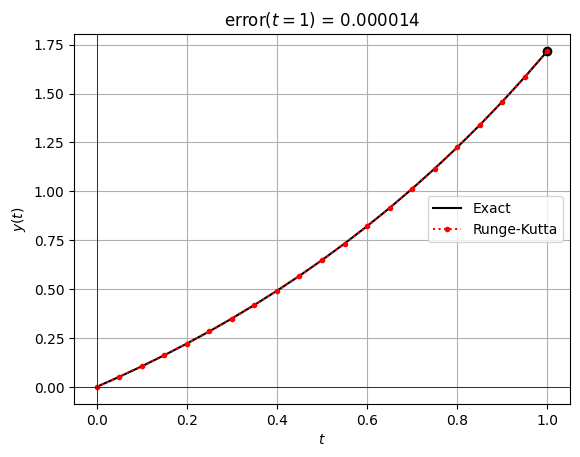

In [8]:
from matplotlib import pyplot as plt

plt.plot(ts_exact, ys_exact, '-k', label='Exact')
plt.plot(ts_exact[-1], ys_exact[-1], 'ok')
plt.plot(dagen, volumes, '.:r', label='Runge-Kutta')
plt.axhline(0.0, lw=0.5, color='k'); plt.axvline(0.0, lw=0.5, color='k')
plt.grid(True); plt.legend()
plt.xlabel('$t$'); plt.ylabel('$y(t)$')
plt.title(f'error$(t=1)$ = {ys_exact[-1] - volumes[-1]:8.6f}')
plt.show()

De runge-kutta test was om te kijken of het overeenkomt met het voorbeeld uit de les

In [9]:
n = 20
v = 10
dt = 1.0 / n
ts_exact = [i * dt for i in range(n+1)]
ys_exact = [exp(t) - 1.0 for t in ts_exact]

model = ode_solver(v,n,dt)
dagen, volumes = model.exponentieel_toenemend(0.0)
x = model.fit(ys_exact, model)
print(x)

Start volume: 10.0, aantal dagen: 20, stapgrootte: 0.05
{'a': 0.2058141971820347, 'b': -0.04904532127128872, 'c': -0.5427254908096144}
